In [ ]:
# Import all necessary libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import io
from google.colab import files 

In [ ]:
# Upload the file
uploaded = files.upload()

Saving CommuteStLouis.csv to CommuteStLouis.csv


In [ ]:
# Create the corresponding dataframe named df
df = pd.read_csv(io.BytesIO(uploaded['CommuteStLouis.csv'])) 
print(df)

          City  Age  Distance  Time Sex
0    St. Louis   52        10    20   M
1    St. Louis   21        35    40   F
2    St. Louis   23        40    45   F
3    St. Louis   38         0     2   M
4    St. Louis   26        15    25   M
..         ...  ...       ...   ...  ..
495  St. Louis   49        10    15   F
496  St. Louis   57         2     5   F
497  St. Louis   35         0     5   F
498  St. Louis   32        10    30   M
499  St. Louis   35         8    10   F

[500 rows x 5 columns]


### 1. Create a statistical summary of the data in the file “CommuteStLouis.csv”. Plot a histogram of age for the CommuteStLouis data.

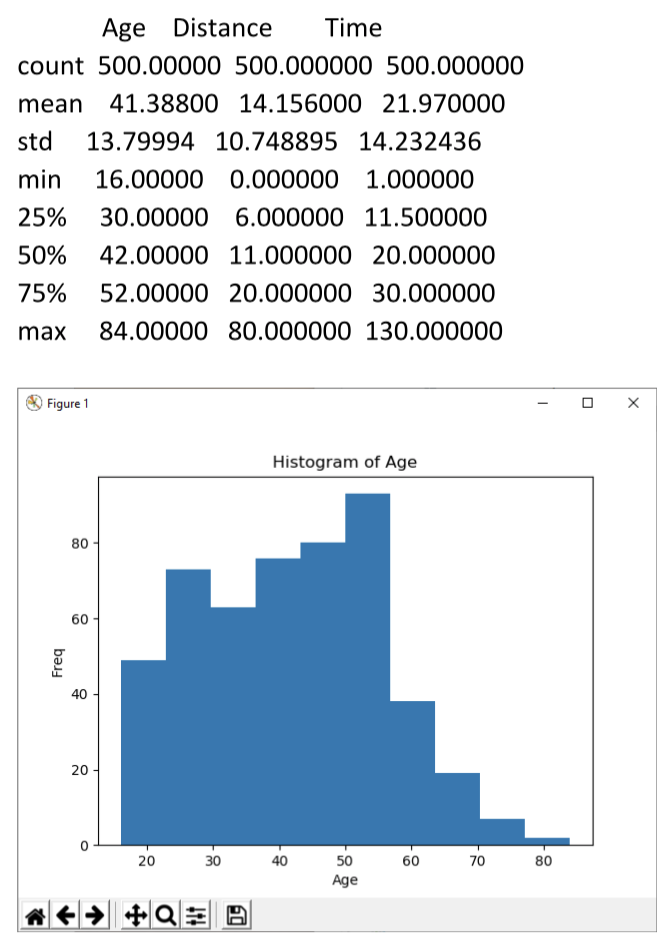

In [ ]:
# Summary of the data
df.describe()

,Age,Distance,Time
count,500.00000,500.000000,500.000000
mean,41.38800,14.156000,21.970000
std,13.79994,10.748895,14.232436
min,16.00000,0.000000,1.000000
25%,30.00000,6.000000,11.500000
50%,42.00000,11.000000,20.000000
75%,52.00000,20.000000,30.000000
max,84.00000,80.000000,130.000000


Text(0.5, 1.0, 'Histogram of Age')

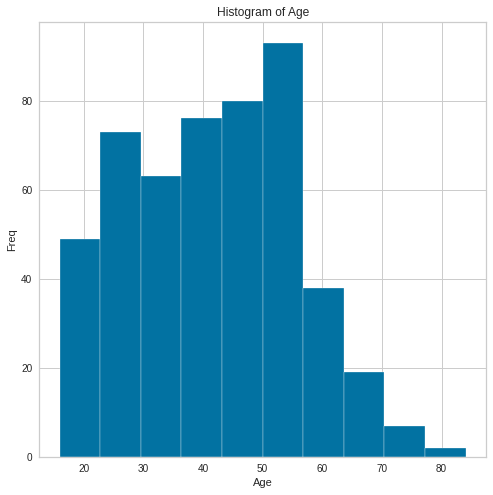

In [ ]:
# 1.1 Using dataframe.hist()
AgeHistogram = df['Age'].hist(figsize = (8, 8))
AgeHistogram.set_xlabel('Age')
AgeHistogram.set_ylabel('Freq')
AgeHistogram.set_title('Histogram of Age')

Text(0.5, 1.0, 'Histogram of Age')

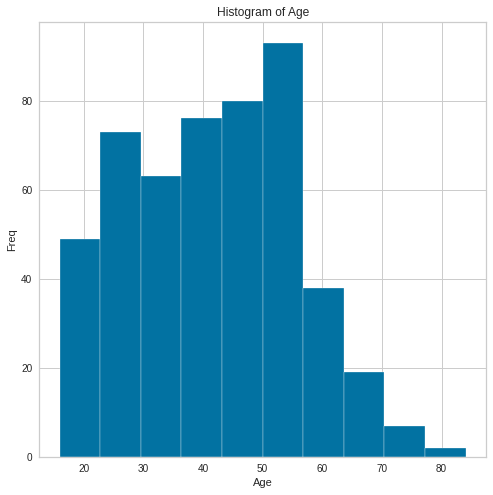

In [ ]:
# 1.2 Using plt.hist
plt.figure(figsize = (8, 8))
AgeHistogramPyplot = plt.hist(df['Age'])
plt.xlabel('Age')
plt.ylabel('Freq', rotation = 90)
plt.title('Histogram of Age')

### 2. For the data CommuteStLouis:

a. Produce a correlation matrix of age, distance and time. Which two numeric variables are most highly correlated? What is the correlation coefficient for the above pair? Hint: If df is your dataframe then you can use print(df.corr()).

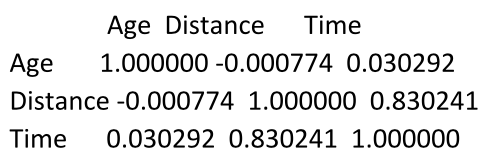

b. Create a scatterplot matrix of the numeric variables in the data. What do the figures in the diagonal going from the top left to the bottom right show? What can you say about the skewness of the various attributes?

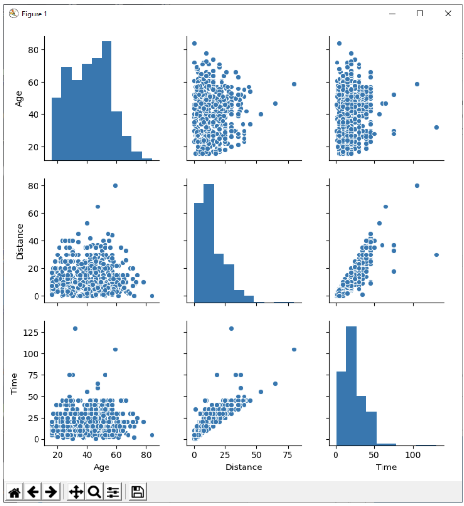

c. Produce a side-by-side boxplot of distance travelled by gender. Do the data in the file indicate that women tend to commute shorter distances?

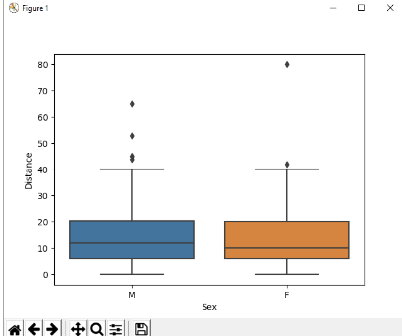

In [ ]:
# 2.a Printing a correlation between variables
print(df.corr())

               Age  Distance      Time
Age       1.000000 -0.000774  0.030292
Distance -0.000774  1.000000  0.830241
Time      0.030292  0.830241  1.000000


As we can see, each variable has a correlation factor of 1 with itself (since if we view Age as x and Age as y, then we must have y = x); in addition, we find that time and distance have a strong correlation (since their correlation factor is about 0.83, which is larger than 0.80), but the remaining factors do not have strong correlations). Furthermore, since for the matrix, both its horizontal and vertical axis follows the order 'Age', 'Distance', and 'Time', and two variables share the same correlation factor, this matrix is symetrical via its diagonal.

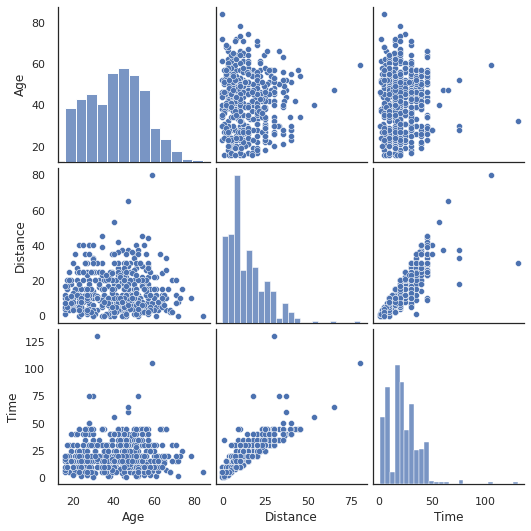

In [ ]:
# 2.b
sns.set_theme(style="white")
sns.pairplot(df)

Subplots from the top left to the bottom right are histograms of Age, Distance, and Time, followingly. For all these attributes, we can find that the two plots showing the correlation between Distance and Time (located in the pairplots(2, 3) and pairplots(3, 2)), obvious positive relationships exist, indicating by a line from origin going toward top right). However, other plots do not imply an obvious correlation between other variable groups.

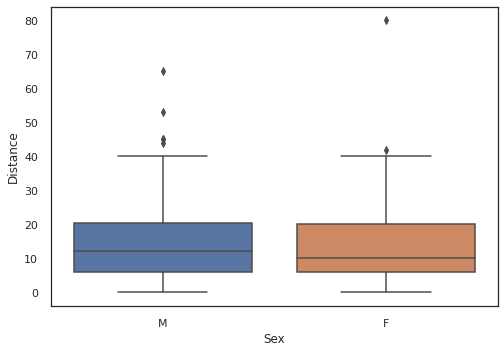

In [ ]:
# 2.c 
sns.boxplot(x = df['Sex'], y = df['Distance'])

From this graph, we can find that with other factors(min, 25%, 75%, and max, as well as the general distribution) similiar, the median distance of males is significantly higher than that of females, indicating that females indeed tend to commute a shorter distance than males.

### 3. For the pair in Question 2.a plot the scatter plot. Also superimpose a linear regression line on the plot.

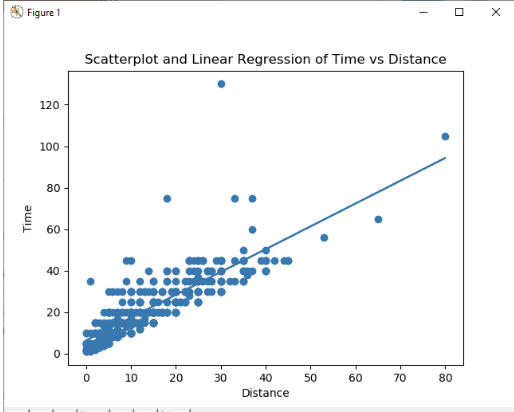

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


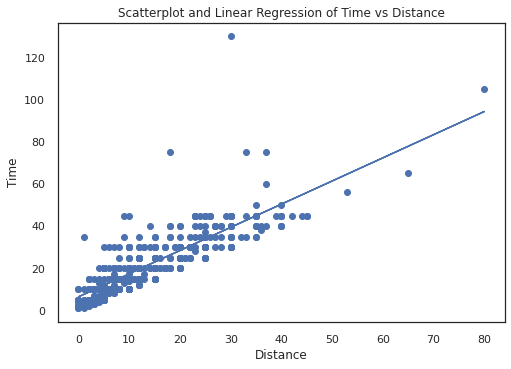

In [ ]:
# 3 - A linear regression model plot
from sklearn.linear_model import LinearRegression

model = LinearRegression()
x = df['Distance']
X = x[:, np.newaxis]
y = df['Time']

model.fit(X, y)

y_predicted = model.predict(X)
plt.scatter(x, y)
plt.plot(x, y_predicted)
plt.title('Scatterplot and Linear Regression of Time vs Distance')
plt.xlabel('Distance')
plt.ylabel('Time')
plt.show()

### 4. Show the distribution of residuals of the data from Part 3.

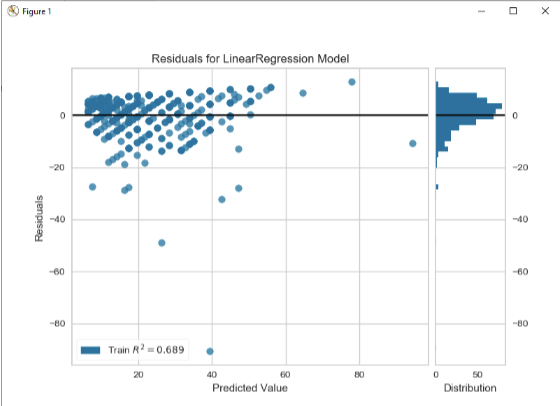

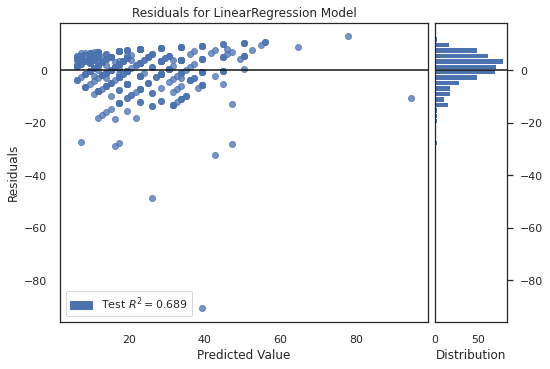

In [ ]:
# 4 Residual plots
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model, test_color = 'b')
visualizer.score(X, y)
visualizer.poof();